In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
# Starting URL for Weather Map API Call
#url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f2e7be3fbf6a6ca5ee22f83c7998246c"

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | koboldo
City not found. Skipping...
Processing Record 2 of Set 1 | songjianghe
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | avarua
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 10 of Set 1 | guerrero negro
Processing Record 11 of Set 1 | gondar
Processing Record 12 of Set 1 | faanui
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | mananjary
Processing Record 15 of Set 1 | karkaralinsk
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | kapustin yar
Processing Record 18 of Set 1 | padang
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1

Processing Record 34 of Set 4 | encruzilhada do sul
Processing Record 35 of Set 4 | mombetsu
Processing Record 36 of Set 4 | mount gambier
Processing Record 37 of Set 4 | tuktoyaktuk
Processing Record 38 of Set 4 | thongwa
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | norwich
Processing Record 41 of Set 4 | severodvinsk
Processing Record 42 of Set 4 | zhigansk
Processing Record 43 of Set 4 | bacolod
Processing Record 44 of Set 4 | stutterheim
Processing Record 45 of Set 4 | kedougou
Processing Record 46 of Set 4 | sechura
Processing Record 47 of Set 4 | pombas
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | kinablangan
Processing Record 0 of Set 5 | khonuu
City not found. Skipping...
Processing Record 1 of Set 5 | sarankhola
Processing Record 2 of Set 5 | garissa
Processing Record 3 of Set 5 | opuwo
Processing Record 4 of Set 5 | port elizabeth
Processing Record 5 of Set 5 | sorvag
City not found. Skipping...
Processing Record 6 of

Processing Record 26 of Set 8 | alice
Processing Record 27 of Set 8 | tautira
Processing Record 28 of Set 8 | karpathos
Processing Record 29 of Set 8 | cap malheureux
Processing Record 30 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 31 of Set 8 | odweyne
Processing Record 32 of Set 8 | fonte boa
Processing Record 33 of Set 8 | lorengau
Processing Record 34 of Set 8 | santiago
Processing Record 35 of Set 8 | port hedland
Processing Record 36 of Set 8 | hede
Processing Record 37 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 8 | saleaula
City not found. Skipping...
Processing Record 39 of Set 8 | gdov
Processing Record 40 of Set 8 | yulara
Processing Record 41 of Set 8 | arawa
Processing Record 42 of Set 8 | esperance
Processing Record 43 of Set 8 | japura
Processing Record 44 of Set 8 | sisimiut
Processing Record 45 of Set 8 | punta cardon
Processing Record 46 of Set 8 | jiwani
Processing Record 47 of Set 8 | mareeba
Processing

Processing Record 17 of Set 12 | weihe
Processing Record 18 of Set 12 | turayf
Processing Record 19 of Set 12 | waingapu
Processing Record 20 of Set 12 | maidstone
Processing Record 21 of Set 12 | luwuk
Processing Record 22 of Set 12 | mayumba
Processing Record 23 of Set 12 | bridgetown
Processing Record 24 of Set 12 | ponta delgada
Processing Record 25 of Set 12 | ushtobe
Processing Record 26 of Set 12 | port hope
Processing Record 27 of Set 12 | tomatlan
Processing Record 28 of Set 12 | xai-xai
Processing Record 29 of Set 12 | urfa
City not found. Skipping...
Processing Record 30 of Set 12 | bara
Processing Record 31 of Set 12 | sergeyevka
Processing Record 32 of Set 12 | vestmannaeyjar
Processing Record 33 of Set 12 | kampot
Processing Record 34 of Set 12 | glyadyanskoye
Processing Record 35 of Set 12 | zabid
Processing Record 36 of Set 12 | baturaja
Processing Record 37 of Set 12 | santa barbara
Processing Record 38 of Set 12 | severo-kurilsk
Processing Record 39 of Set 12 | farah


In [4]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Show Record Count
city_data_pd.count()

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [5]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,songjianghe,42.1859,127.4790,28.54,97,100,3.56,CN,1611625257
1,ushuaia,-54.8000,-68.3000,46.40,61,75,21.85,AR,1611624933
2,hithadhoo,-0.6000,73.0833,80.80,74,100,3.62,MV,1611624923
3,barrow,71.2906,-156.7887,-5.80,84,40,12.66,US,1611624920
4,narsaq,60.9167,-46.0500,24.80,26,54,27.63,GL,1611624750


In [6]:
city_data_pd.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,20.634267,18.185470,49.177444,74.913644,57.291883,8.203903,1.611625e+09
std,33.058768,88.284293,32.501791,18.875649,40.129498,6.175539,1.888126e+02
min,-54.800000,-179.166700,-56.110000,19.000000,0.000000,0.380000,1.611625e+09
25%,-5.723750,-59.575000,30.165000,65.000000,20.000000,3.515000,1.611625e+09
50%,22.308200,26.066700,61.050000,79.000000,75.000000,6.890000,1.611625e+09
75%,48.809050,93.158450,75.020000,88.000000,98.000000,11.340000,1.611625e+09
max,78.218600,179.316700,100.400000,100.000000,100.000000,36.600000,1.611625e+09


In [7]:
dirty_city_data = city_data_pd[(city_data_pd["Humidity"] > 100)].index
                                  
dirty_city_data

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_pd.drop(dirty_city_data, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,songjianghe,42.1859,127.4790,28.54,97,100,3.56,CN,1611625257
1,ushuaia,-54.8000,-68.3000,46.40,61,75,21.85,AR,1611624933
2,hithadhoo,-0.6000,73.0833,80.80,74,100,3.62,MV,1611624923
3,barrow,71.2906,-156.7887,-5.80,84,40,12.66,US,1611624920
4,narsaq,60.9167,-46.0500,24.80,26,54,27.63,GL,1611624750


In [9]:
# Extract relevant fields from the data frame
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

# Export the City_Data into a csv
clean_city_data.to_csv(output_data_file, index_label="City_ID")

<function matplotlib.pyplot.show(*args, **kw)>

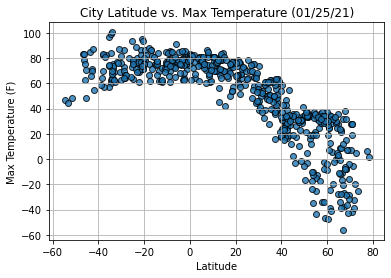

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show

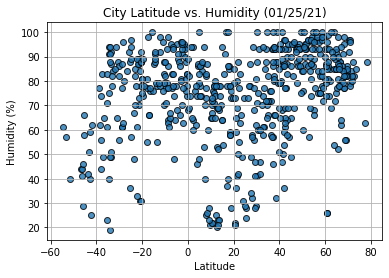

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

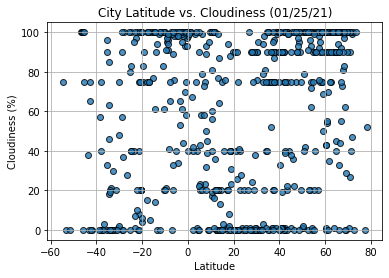

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

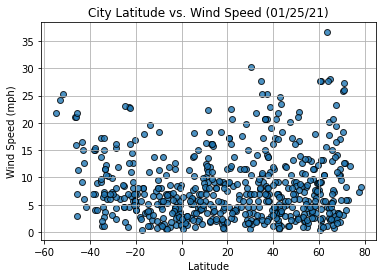

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [14]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] >= 0)]
southern_hemi_df = city_data_pd.loc[(city_data_pd["Lat"] < 0)]

The r-value is: 0.7213147082931205


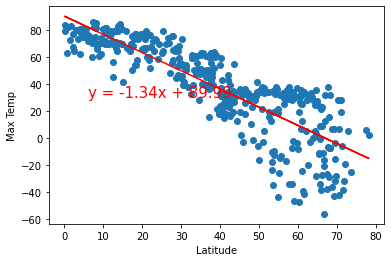

In [16]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(6,30))

The r-value is: 0.06521884954046864


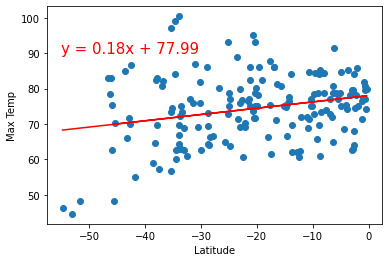

In [17]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp', (-55, 90))

The r-value is: 0.15096201807314708


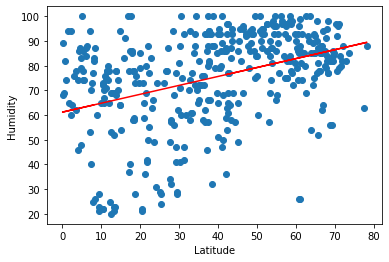

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity',(40,10))

The r-value is: 0.22412200419110181


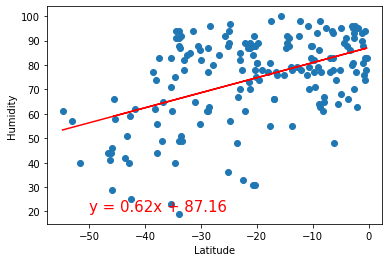

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 'Humidity', (-50, 20))

The r-value is: 0.09796379588655514


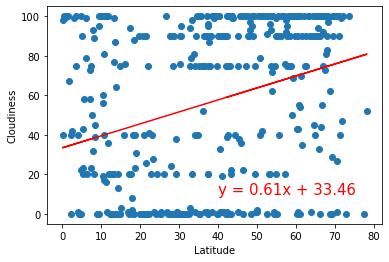

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (40,10))

The r-value is: 0.18683641959216063


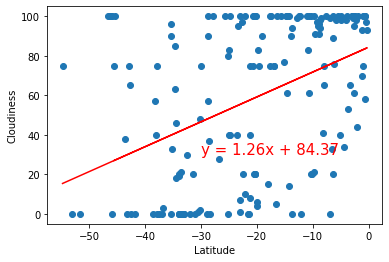

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 'Cloudiness', (-30,30))

The r-value is: 0.013151440252966157


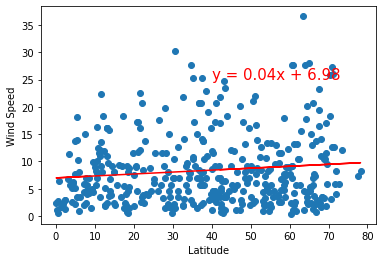

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (40,25))

The r-value is: 0.1967836163970442


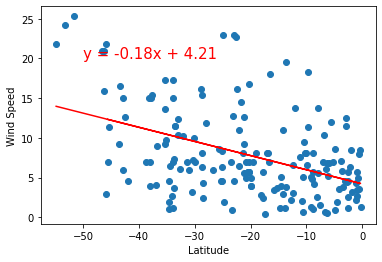

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 'Wind Speed', (-50, 20))